In [100]:
from trainer import Trainer
import constants

import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random
random.seed(42)
np.random.seed(42)


In [101]:
# %pip install scikit-learn
# %pip install seaborn
# %pip install numpy==1.26.3

In [102]:
embeddings = {}
text_labels = []
raw_text_labels_files = []

for file_path in constants.file_paths:
    with open(file_path + "_embeddings_.json", "r") as f:
        embeddings_objects = json.load(f)
        for emb_obj in embeddings_objects:
            embeddings[emb_obj["hash"]] = np.array(emb_obj["embeddings"])

    with open(file_path + "_labeled_fewer_classes.json", "r") as f:
        text_labels_file = json.load(f)
        raw_text_labels_files.append({'ds': file_path, 'raw': text_labels_file})
        for text_hash, doc_info in text_labels_file.items():
            labels_list = [label["system"] for label in doc_info["label"]]
            text_labels.append((text_hash, labels_list))



In [103]:
# Assuming your initial data processing steps
filtered_embeddings = []
filtered_text_labels = []
doc_values_initial = []
doc_values = []

for item in raw_text_labels_files:
    raw_data = item.get('raw', {})
    for key, value in raw_data.items():
        doc_value = value.get('doc')
        if doc_value:
            doc_values_initial.append(doc_value)

for i, (sample_id, classes) in enumerate(text_labels):
    if classes:
        for label in classes:
            filtered_embeddings.append(embeddings[sample_id])
            filtered_text_labels.append(label)
            doc_values.append(doc_values_initial[i])



In [104]:
print(len(doc_values))

7026


In [105]:
%pip install top2vec nltk
%pip install top2vec[sentence_encoders]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [106]:
from top2vec import Top2Vec

In [107]:
# import nltk
# nltk.download('stopwords')

# def remove_stopwords(text):
#     stopwords = nltk.corpus.stopwords.words('english')
#     text = [word for word in text if word not in stopwords]
#     return text
# def tok(text):
#     import gensim
#     text = gensim.utils.simple_preprocess(text)
#     text = remove_stopwords(text)
#     return text
# topic_model = Top2Vec(
#     doc_values,
#     embedding_model="universal-sentence-encoder",
#     speed="deep-learn",
#     tokenizer=tok,
#     ngram_vocab=True,
#     ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"},
# )

In [108]:
model_path = 'model/topic2vec'

topic_model = Top2Vec.load(model_path)
topic_model.save(model_path)

In [109]:
topic_model.get_num_topics()

37

In [110]:
topic_words, word_scores, topic_nums = topic_model.get_topics(37)

In [111]:
topics_names = """Medical Research Methods
Conflict & Political Violence
Governance & Administration
Financial Market Insights
Corporate Announcements
Sports Coaching & Management
Football League Analysis
Cricket Performance Metrics
Chinese Sociopolitical Landscape
Athletic Achievements & Championship
German Language Constructs
Commodity Trading Dynamics
Financial Performance Metrics
News Outlets & Reporting
Notable Athletes & Celebrities
Stock Market Insights
Corporate Collaborations
Political Campaigns & Elections
Sports League Standings
International Soccer Competitions
Sports Highlights and Matches
Baseball and Player Profiles
Kurdish Political Landscape
Soccer Leagues and Matches
Tennis Tournaments and Champions
Research and Reports
Baseball Inning Details
Football and Player Profiles
Miscellaneous German Phrases
Tennis Tournament Highlights
MLB Teams and Matchups
Israeli-Palestinian Relations
Soccer Leagues and Competitions
Soccer and Player Profiles
MLB Team Rivalries"""
topics_names = topics_names.split("\n")

In [112]:
document_topics, scores, words, topic_word_emb = topic_model.get_documents_topics(doc_ids=list(range(len(doc_values))))

In [113]:

reduced_topics = topic_model.hierarchical_topic_reduction(num_topics=12)
reduced_topics

[[0],
 [14, 19, 28, 1],
 [9, 11, 29, 34, 2],
 [10, 20, 30, 3],
 [8, 25, 5],
 [27, 18, 16, 36, 35, 22],
 [33, 15, 26, 7],
 [17, 6],
 [4],
 [31, 12],
 [23, 32, 21],
 [24, 13]]

In [114]:
reduced_topics

[[0],
 [14, 19, 28, 1],
 [9, 11, 29, 34, 2],
 [10, 20, 30, 3],
 [8, 25, 5],
 [27, 18, 16, 36, 35, 22],
 [33, 15, 26, 7],
 [17, 6],
 [4],
 [31, 12],
 [23, 32, 21],
 [24, 13]]

In [115]:
topic_model.hierarchical_topic_reduction(num_topics=12)
# reduced_topics = topic_model.hierarchical_topic_reduction(num_topics=12)
# reduced_topics = [ [topics_names[t] for t in topics] for topics in reduced_topics ]
# for t in reduced_topics:
#     print(t)

topics_names_12 = """
Biomedical
Political Conflict News
Financial Market Trends
Government Legal Updates
Cricket Match Reports
Baseball Highlights
Corporate Market Insights
Global Sports Coverage
World Championships
International Cricket
Football League Standings
German Language""".split("\n")[1:]
topics_names_12_abbr = "MED POL FINMA GOV ANALYSIS PLAYERS CORP CELEBNEWS CHAMP EVENT MATCHES GRMN".split(" ")

In [116]:
topic_model.get_topics(reduced=True)

(array([['searched pubmed', 'interferon ifn', 'neutrophil lymphocyte',
         'pubmed embase', 'participated study', 'phenotypic plasticity',
         'pubmed medline', 'virulence factors', 'observational study',
         'interferon beta', 'fmri studies', 'observational cohort',
         'biomedical research', 'observational studies',
         'streptococcus pneumoniae', 'bioinformatics analysis',
         'necrosis factor', 'difference observed', 'biopsies',
         'myasthenia gravis', 'biochemical characteristics',
         'tested hypothesis', 'quantitative polymerase',
         'phylogenetic analyses', 'lymphocyte ratio',
         'myocardial ischemia', 'cohort study', 'assess efficacy',
         'patients received', 'showed statistically',
         'differences observed', 'coronary intervention', 'whole genome',
         'statin treatment', 'streptococcus mutans', 'way anova',
         'antibody responses', 'test hypothesis', 'allele specific',
         'antigen specific', 'r

In [117]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
document_topics_one_hot = one_hot_encoder.fit_transform(np.reshape(document_topics, (-1,1)))

In [118]:
document_topics_one_hot

<7026x37 sparse matrix of type '<class 'numpy.float64'>'
	with 7026 stored elements in Compressed Sparse Row format>

In [119]:
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(document_topics_one_hot).toarray()

In [120]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(filtered_text_labels)

X_emb_only = np.array(filtered_embeddings)

X_topics = np.array(sparse_matrix)

pca = PCA(n_components=100)

filtered_embeddings_pca = pca.fit_transform(filtered_embeddings)

X_combined_one_hot = np.hstack((X_topics, filtered_embeddings))

X_combined_one_hot_pca = np.hstack((X_topics, filtered_embeddings_pca))


X_combined_top_word_emb = np.hstack((topic_word_emb, filtered_embeddings))
X_combined_top_word_emb_pca = np.hstack((topic_word_emb, filtered_embeddings_pca))

X_topic_word_emb = topic_word_emb



In [121]:
document_topics = [[e] for e in document_topics]
print(len(document_topics))
len(X_topics)

7026


7026

In [122]:
X_combined_topic_num_PCA_emb = np.hstack((document_topics, filtered_embeddings))

In [123]:

assert len(filtered_text_labels) == len(sparse_matrix)

In [124]:
def evaluate(X, y):
    result = {}
    original_indices = list(range(len(X)))

    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, original_indices, test_size=0.3, random_state=42)
    trainer = Trainer()
    trainer.train(X_train, y_train)


    train_predictions = trainer.predict(X_train)
    test_predictions = trainer.predict(X_test) 


    for name, preds in test_predictions.items():
        accuracy, f1_w, recall_w, precision_w, f1_ma, recall_ma, precision_ma, f1_mi, recall_mi, precision_mi  = trainer.evaluate(y_test, preds)
        result[name] = { 
                        'accuracy': accuracy,
                        'f1_w': f1_w,
                        'recall_w': recall_w,
                        'precision_w': precision_w ,
                        'f1_ma': f1_ma,
                        'recall_ma': recall_ma,
                        'precision_ma': precision_ma ,
                        'f1_mi': f1_mi,
                        'recall_mi': recall_mi,
                        'precision_mi': precision_mi,
                        'best_params': trainer.get_best_params()
                        }
    return result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test

In [125]:
def plot_confusion_matrices(test_predictions, y_test):
    predefined_labels = {
            'Babelfy': 'Babelfy',  
            'DBpediaSpotlight': 'DBpedia',  
            'REL MD (.properties)': 'REL',
            'Refined MD (.properties)': 'ReFinED',
            'Relik MD (.properties)': 'Relik',
            'SpEL MD (.properties)': 'SpEL',
            # 'Flair MD (.properties)': 'Flair',
            'Spacy MD (.properties)': 'SpaCy',
            'TagMe': 'TagMe', 
            'TextRazor': 'TextRazor', 
    }
    test_predictions = {
        "mlp": test_predictions["mlp"]
    }

    class_names = [predefined_labels[l] for l in label_encoder.classes_]
    n_matrices = len(test_predictions)
    
    n_cols = 2  
    n_rows = (n_matrices + n_cols - 1) // n_cols 
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 6))
    axes = axes.flatten()  
    
    for i, (name, preds) in enumerate(test_predictions.items()):
        cm = confusion_matrix(y_test, preds)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                    xticklabels=class_names, yticklabels=class_names, ax=axes[i])
        axes[i].set_xlabel('Predicted labels', fontsize=12, fontweight="bold")
        axes[i].set_ylabel('True labels', fontsize=12, fontweight="bold")
        # axes[i].set_title(f'Confusion Matrix - {name}')
        
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].tick_params(axis='y', rotation=45)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    return fig


In [126]:
results_dict = {}

In [127]:
print("----------------- evaluate:  one encoding (noisy) ---------------------")
oneHotOnly = evaluate(X_topics, y)
results_dict['oneHotOnly'] = oneHotOnly[0]


----------------- evaluate:  one encoding (noisy) ---------------------
Training dummy_mf...


Training dummy_un...
Training random_forest...
Training svm...
Training knn...
Training mlp...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [128]:
# import pickle
# with open("oneHotOnly.pickle", "wb") as oneHotOnlyFile:
#     pickle.dump(oneHotOnly, oneHotOnlyFile)

In [151]:

import pickle

with open("combOneHot.pickle", "rb") as combOneHotFile:
    combOneHot= pickle.load(combOneHotFile)

In [152]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = oneHotOnly

In [153]:
result

{'dummy_mf': {'accuracy': 0.2381404174573055,
  'f1_w': 0.0916065054126953,
  'recall_w': 0.2381404174573055,
  'precision_w': 0.05671085842673974,
  'f1_ma': 0.042741592166879526,
  'recall_ma': 0.1111111111111111,
  'precision_ma': 0.026460046384145054,
  'f1_mi': 0.2381404174573055,
  'recall_mi': 0.2381404174573055,
  'precision_mi': 0.2381404174573055,
  'best_params': {'dummy_mf': {},
   'dummy_un': {},
   'random_forest': {'max_depth': 20, 'n_estimators': 50},
   'svm': {'C': 1, 'kernel': 'linear'},
   'knn': {'n_neighbors': 7, 'p': 1},
   'mlp': {'activation': 'tanh',
    'hidden_layer_sizes': (50, 50),
    'solver': 'sgd'}}},
 'dummy_un': {'accuracy': 0.10341555977229601,
  'f1_w': 0.11659974863213568,
  'recall_w': 0.10341555977229601,
  'precision_w': 0.15430020055478794,
  'f1_ma': 0.09009450231947311,
  'recall_ma': 0.12370839752040824,
  'precision_ma': 0.10316845244170501,
  'f1_mi': 0.10341555977229601,
  'recall_mi': 0.10341555977229601,
  'precision_mi': 0.10341555977

In [154]:
len(X_test)

2108

In [155]:
from collections import defaultdict


# X_test = np.array([
#     [1, 0, 0, 1],  # Sample 1
#     [1, 0, 0, 1],  # Sample 1 
#     [0, 1, 0, 0],  # Sample 2
#     [0, 1, 0, 0],  # Sample 2 
# ])

# y_test = np.array([2, 5, 1, 4]) 
# [[2, 5], [2, 5], [1, 4], [1, 4]]
def aggregate_targets_by_X(X, y):
    X_to_y_map = defaultdict(list)
    
    for i in range(len(X)):
        X_tuple = tuple(X[i])
        
        X_to_y_map[X_tuple].append(y[i])
    
    new_y_test = []
    
    for i in range(len(X)):
        X_tuple = tuple(X[i])
        
        new_y_test.append(X_to_y_map[X_tuple])
    
    return X, new_y_test
def metrics_at_k(X_test, y_test, trainer, k=2, model='mlp'):
    test_probabilities = trainer.get_trained_models()[model].predict_proba(X_test)
    top_k_test_indices = np.argsort(test_probabilities, axis=1)[:, -k:]
    top_k_test_indices = [list(reversed(v)) for v in top_k_test_indices]

    _, new_y_test = aggregate_targets_by_X(X=X_test, y=y_test)
    new_y_test = [set(y) for y in new_y_test]
    # DONT FORGET TO CHANGE TOP 2
    print("precision@" + str(k) + " for :" + model + " is " + str(trainer.precision_at_k(k=k, y_pred=top_k_test_indices, y_true=new_y_test)))
    print("recall@" + str(k) + " for    :" + model + " is " + str(trainer.recall_at_k(k=k, y_pred=top_k_test_indices, y_true=new_y_test)))
    print("f1@" + str(k) + " for        :" + model + " is " + str(trainer.f1_at_k(k=k, y_pred=top_k_test_indices, y_true=new_y_test)))


In [156]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.941888045540797
recall@2 for    :dummy_mf is 0.3013915243516716
f1@2 for        :dummy_mf is 0.4566584711734788
precision@3 for :dummy_mf is 0.8632194813409254
recall@3 for    :dummy_mf is 0.38567362428842955
f1@3 for        :dummy_mf is 0.5331456862472856
precision@2 for :dummy_un is 0.7967267552182163
recall@2 for    :dummy_un is 0.21181214421252553
f1@2 for        :dummy_un is 0.33465521750229166
precision@3 for :dummy_un is 0.796015180265659
recall@3 for    :dummy_un is 0.31850885515496635
f1@3 for        :dummy_un is 0.4549706882843547
precision@2 for :random_forest is 0.9672675521821632
recall@2 for    :random_forest is 0.3177893738140359
f1@2 for        :random_forest is 0.4784026971883954
precision@3 for :random_forest is 0.9237824161922871
recall@3 for    :random_forest is 0.43572106261860477
f1@3 for        :random_forest is 0.5921447973987497
precision@2 for :svm is 0.9727229601518027
recall@2 for    :svm is 0.321821631878552
f1@2 for        :s

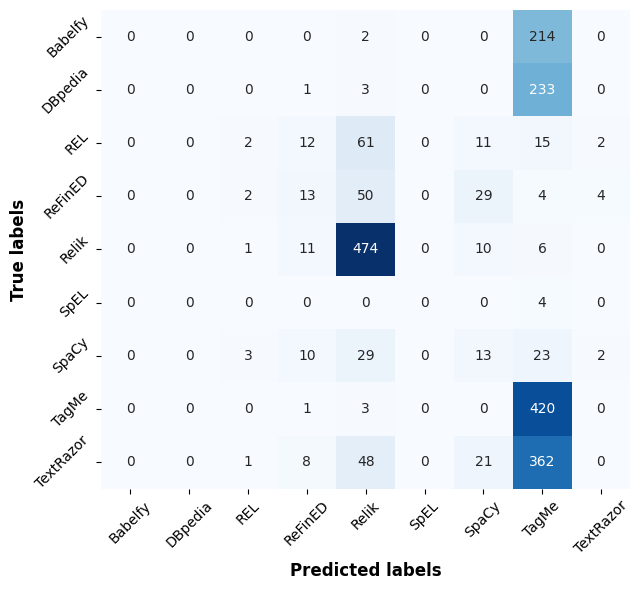

In [157]:
fig = plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)
# fig.savefig("CM_mlp_PCA.pdf", format="pdf", bbox_inches="tight")

In [158]:
def get_ds_name(idx):
    for ds in raw_text_labels_files:
        ds_name = ds['ds']
        ds = ds['raw']
        for _, value in ds.items():
            doc = value['doc']
            if doc_values[idx] == doc:
                return ds_name
    return None


In [159]:
ds_doc_topics = {}
for idx in idx_test:
    ds_name = get_ds_name(idx)
    if ds_name not in ds_doc_topics:
        ds_doc_topics[ds_name] = {}
        ds_doc_topics[ds_name]['doc'] = []
    document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[idx],reduced=True, num_topics=432897)
    ds_doc_topics[ds_name]['doc'].append({
        'text': doc_values[idx],
        'topics': document_topics,
        'scores': scores
    })

In [160]:
ds_doc_topics

{'/local/users/unjde/analysis/data/datasets/medmention/corpus_pubtator.json': {'doc': [{'text': 'Predicting MEK Inhibitor Response in Lung Cancer: A Proper Signature Is Required. The ERK signaling pathway is one of the most commonly deregulated pathways in cancer. Assays that accurately measure ERK signaling output in clinical specimens would be extremely helpfu l not only in determining the pharmacodynamic effects of drug treatment but also in selecting those patients most likely to respond to therapy. Clin Cancer Res; 23(6); 1365-7. ©2016 AACRSee related article by Brant et al., p. 1471.',
    'topics': array([[ 0,  2,  9,  1,  8,  3,  4,  5,  6, 11,  7, 10]]),
    'scores': array([[0.60387194, 0.30116993, 0.28181037, 0.2240499 , 0.2170553 ,
            0.19968525, 0.14564572, 0.10201131, 0.08867593, 0.08781404,
            0.05640583, 0.03920671]], dtype=float32)},
   {'text': 'Use of Platelet Function Testing Before Pipeline Embolization Device Placement: A Multicenter Cohort Study

In [161]:
def calculate_avgs(ds_doc_topics):
    for key, value in ds_doc_topics.items():
        topic_totals = {}
        topic_counts = {}

        value = value['doc']
        for sample in value:
            topics = sample['topics'][0]
            scores = sample['scores'][0]
            
            for topic, score in zip(topics, scores):
                if topic in topic_totals:
                    topic_totals[topic] += score
                    topic_counts[topic] += 1
                else:
                    topic_totals[topic] = score
                    topic_counts[topic] = 1

        topic_averages = {topic: topic_totals[topic] / topic_counts[topic] for topic in topic_totals}

        sorted_topics_total = sorted(topic_totals.items(), key=lambda item: item[1], reverse=True)
        sorted_topics_avg = sorted(topic_averages.items(), key=lambda item: item[1], reverse=True)
        ds_doc_topics[key]['topics'] = [f for f, _ in sorted_topics_total]
        ds_doc_topics[key]['avgs'] = [s if s > 0 else 0 for _, s in sorted_topics_avg]

In [162]:
calculate_avgs(ds_doc_topics=ds_doc_topics)

In [163]:
import random
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def plot_topics_vs(ds_doc_topics, title, y_offset, ncols):
    topics = topics_names_12_abbr 
    avgs_matrix = np.zeros((len(ds_doc_topics), len(topics)))

    sorted_ds = sorted(ds_doc_topics.keys())

    for i, label in enumerate(sorted_ds):
        data = ds_doc_topics[label]
        for j, topic_index in enumerate(data['topics']):
            avgs_matrix[i, topic_index] = data['avgs'][j]

    bar_sums = avgs_matrix.sum(axis=0)  

    normalized_avgs_matrix = avgs_matrix / bar_sums[np.newaxis, :] 

    normalized_avgs_matrix = np.nan_to_num(normalized_avgs_matrix)

    fig, ax = plt.subplots(figsize=(6, 6))

    bar_width = 0.8
    bottoms = np.zeros(len(topics))  

    for i, label in enumerate(sorted_ds):
        predefined_colors = {
            'Babelfy': '#FF6347',  
            'DBpediaSpotlight': '#4682B4',  
            'REL MD (.properties)': '#32CD32',
            'Refined MD (.properties)': '#FF8C00',
            'Relik MD (.properties)': '#FFD700',
            'SpEL MD (.properties)': '#00FF7F',
            'Spacy MD (.properties)': '#FF69B4',
            'TagMe': '#8A2BE2', 
            'TextRazor': '#00CED1', 
            'AIDA-YAGO2-dataset.tsv_nif': '#FF4500',
            'KORE_50_DBpedia.ttl': '#1E90FF', 
            'News-100.ttl': '#228B22',  
            'RSS-500.ttl': '#FF1493', 
            'Reuters-128.ttl': '#DC143C',  
            'corpus_pubtator.json': '#4B0082'
        }
        predefined_labels = {
            'Babelfy': 'Babelfy',  
            'DBpediaSpotlight': 'DBpedia',  
            'REL MD (.properties)': 'REL',
            'Refined MD (.properties)': 'ReFinED',
            'Relik MD (.properties)': 'Relik',
            'SpEL MD (.properties)': 'SpEL',
            'Spacy MD (.properties)': 'SpaCy',
            'TagMe': 'TagMe', 
            'TextRazor': 'TextRazor', 
            'AIDA-YAGO2-dataset.tsv_nif': 'AIDA CoNLL-YAGO',
            'KORE_50_DBpedia.ttl': 'KORE 50', 
            'News-100.ttl': 'News-100',  
            'RSS-500.ttl': 'RSS-500', 
            'Reuters-128.ttl': 'Reuters-128',  
            'corpus_pubtator.json': 'MedMention'
        }
        default_color = random_color()
        label = label.split('/')[-1]
        color = predefined_colors.get(label, default_color)

        ax.bar(topics, normalized_avgs_matrix[i], bar_width, bottom=bottoms, label=predefined_labels[label], color=color)
        bottoms += normalized_avgs_matrix[i]  

    ax.set_xlabel('Topics', fontsize=12, fontweight="bold")
    ax.set_ylabel('Normalized Topic Scores', fontsize=12, fontweight="bold")
    ax.set_title(title)
    plt.xticks(rotation=45, ha='right', fontsize=12)

    ax.legend(loc='lower left', bbox_to_anchor=(y_offset, 1), ncols=ncols)





    plt.tight_layout()
    plt.show()
    return fig

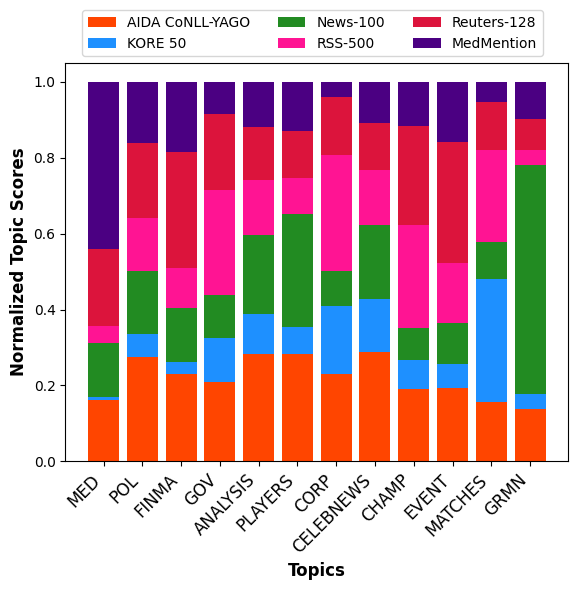

In [164]:
fig = plot_topics_vs(ds_doc_topics=ds_doc_topics, title="", ncols=3, y_offset=0.02)
fig.savefig("CM_mlp_PCA.pdf", format="pdf", bbox_inches="tight")
# Test only DS vs Topics

In [165]:
label_encoder.classes_

array(['Babelfy', 'DBpediaSpotlight', 'REL MD (.properties)',
       'Refined MD (.properties)', 'Relik MD (.properties)',
       'SpEL MD (.properties)', 'Spacy MD (.properties)', 'TagMe',
       'TextRazor'], dtype='<U24')

In [166]:
def gen_pred_sys_doc_topics(test_predictions, idx_test, model):
    sys_doc_topics = {}
    if model == "gt":
        for model_idx, original_idx in enumerate(idx_test):
            system = label_encoder.classes_[test_predictions[model_idx]]
            if system not in ds_doc_topics:
                sys_doc_topics[system] = {}
                sys_doc_topics[system]['doc'] = []
            document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[original_idx],reduced=True, num_topics=432897)
            sys_doc_topics[system]['doc'].append({
                'text': doc_values[original_idx],
                'topics': document_topics,
                'scores': scores
            })
        return sys_doc_topics
        
    for model_idx, original_idx in enumerate(idx_test):
        system = label_encoder.classes_[test_predictions[model][model_idx]]
        if system not in ds_doc_topics:
            sys_doc_topics[system] = {}
            sys_doc_topics[system]['doc'] = []
        document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[original_idx],reduced=True, num_topics=432897)
        sys_doc_topics[system]['doc'].append({
            'text': doc_values[original_idx],
            'topics': document_topics,
            'scores': scores
        })
    return sys_doc_topics

In [167]:
sys_doc_topics_gt_test = gen_pred_sys_doc_topics(test_predictions=y_test, idx_test=idx_test, model='gt')
calculate_avgs(sys_doc_topics_gt_test)

In [168]:
sys_doc_topics_gt_test

{'DBpediaSpotlight': {'doc': [{'text': 'Integrating Evidence From Systematic Reviews, Qualitative Research, and Expert Knowledge Using Co-Design Techniques to Develop a Web -Based Intervention for People in the Retirement Transition. Integrating stakeholder involvement in complex health intervention design maximizes acceptability and potential effectiveness. However, there is little methodological guidance about how to integrate evidence systematically from various sources in this process. Scientific evidence derived from different approaches can be difficult to integrate and the problem is compounded when attempting to include diverse, subjective input from stakeholders. The intent of the study was to describe and appraise a systematic, sequential approach to integrate scientific evidence, expert knowledge and experience, and stakeholder involvement in the co-design and development of a complex health intervention. The development of a Web -based lifestyle intervention for people in r

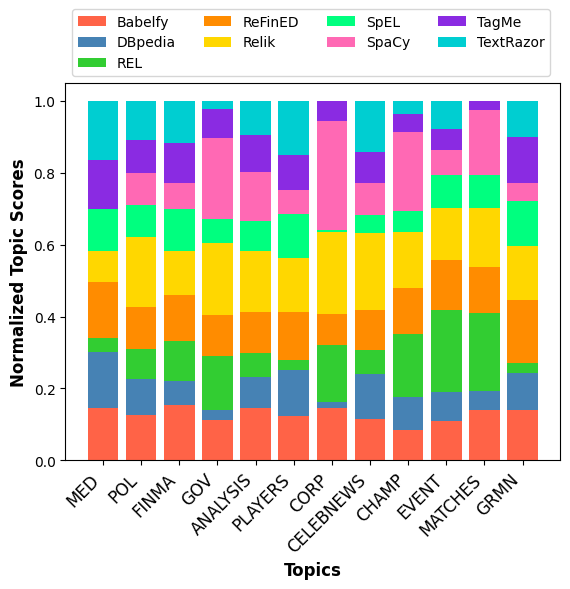

In [169]:
# GT TEST ONLY 
fig = plot_topics_vs(sys_doc_topics_gt_test, title="", y_offset=0, ncols=4)
# fig.savefig("systems_gt_test_only.pdf", format="pdf", bbox_inches="tight")

In [170]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model='mlp')
calculate_avgs(sys_doc_topics)

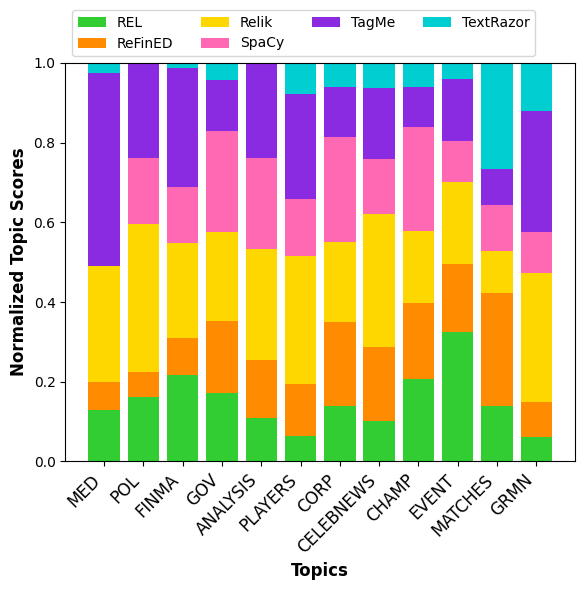

In [171]:
fig = plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 
fig.savefig("ohe.pdf", format="pdf", bbox_inches="tight")

In [49]:
# print("----------------- evaluate: combined one one encoding (noisy) ---------------------")
# combOneHot = evaluate(X_combined_one_hot, y)
# import pickle
# with open("combOneHot.pickle", "wb") as combOneHotFile:
#     pickle.dump(combOneHot, combOneHotFile)
# import pickle

# with open("combOneHot.pickle", "rb") as combOneHotFile:
#     combOneHot= pickle.load(combOneHotFile)

In [50]:
# import pickle
# with open("combOneHot.pickle", "wb") as combOneHotFile:
#     pickle.dump(combOneHot, combOneHotFile)

In [51]:
import pickle

with open("combOneHot.pickle", "rb") as combOneHotFile:
    combOneHot= pickle.load(combOneHotFile)

In [52]:
results_dict['combOneHot'] = combOneHot[0]

In [53]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = combOneHot

In [54]:
result

{'dummy_mf': {'accuracy': 0.2381404174573055,
  'f1_w': 0.0916065054126953,
  'recall_w': 0.2381404174573055,
  'precision_w': 0.05671085842673974,
  'f1_ma': 0.042741592166879526,
  'recall_ma': 0.1111111111111111,
  'precision_ma': 0.026460046384145054,
  'f1_mi': 0.2381404174573055,
  'recall_mi': 0.2381404174573055,
  'precision_mi': 0.2381404174573055,
  'best_params': {'dummy_mf': {},
   'dummy_un': {},
   'random_forest': {'max_depth': 20, 'n_estimators': 200},
   'svm': {'C': 1, 'kernel': 'rbf'},
   'knn': {'n_neighbors': 7, 'p': 2},
   'mlp': {'activation': 'relu',
    'hidden_layer_sizes': (50,),
    'solver': 'sgd'}}},
 'dummy_un': {'accuracy': 0.1110056925996205,
  'f1_w': 0.12828826131220494,
  'recall_w': 0.1110056925996205,
  'precision_w': 0.17618842828435088,
  'f1_ma': 0.09484271794968416,
  'recall_ma': 0.09938199194021699,
  'precision_ma': 0.11372845142097596,
  'f1_mi': 0.1110056925996205,
  'recall_mi': 0.1110056925996205,
  'precision_mi': 0.1110056925996205,
  

In [55]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.23505692599620492
recall@2 for    :dummy_mf is 0.4468690702087287
f1@2 for        :dummy_mf is 0.30806765118389573
precision@3 for :dummy_mf is 0.22438330170777546
recall@3 for    :dummy_mf is 0.6480075901328273
f1@3 for        :dummy_mf is 0.3333415879639182
precision@2 for :dummy_un is 0.2120493358633776
recall@2 for    :dummy_un is 0.4098671726755218
f1@2 for        :dummy_un is 0.27949752278559614
precision@3 for :dummy_un is 0.1571790006325104
recall@3 for    :dummy_un is 0.4478178368121442
f1@3 for        :dummy_un is 0.23268736528555667
precision@2 for :random_forest is 0.3420303605313093
recall@2 for    :random_forest is 0.6622390891840607
f1@2 for        :random_forest is 0.4510858604645326
precision@3 for :random_forest is 0.28130929791271225
recall@3 for    :random_forest is 0.8083491461100568
f1@3 for        :random_forest is 0.41737139194014994
precision@2 for :svm is 0.36740986717267554
recall@2 for    :svm is 0.7044592030360531
f1@2 for    

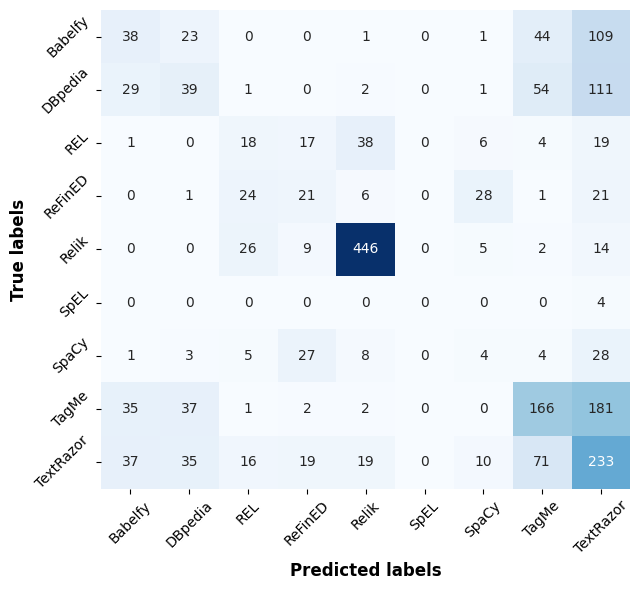

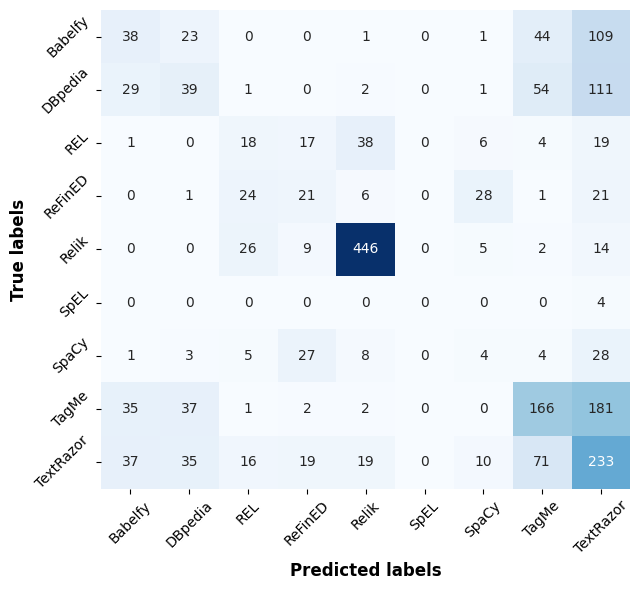

In [56]:
plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)

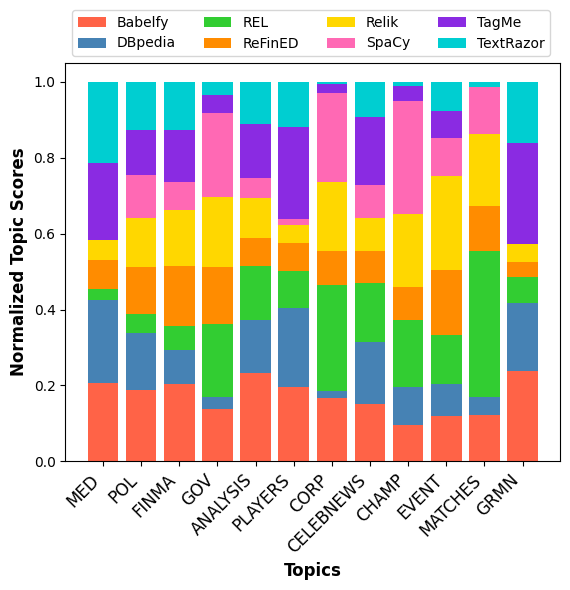

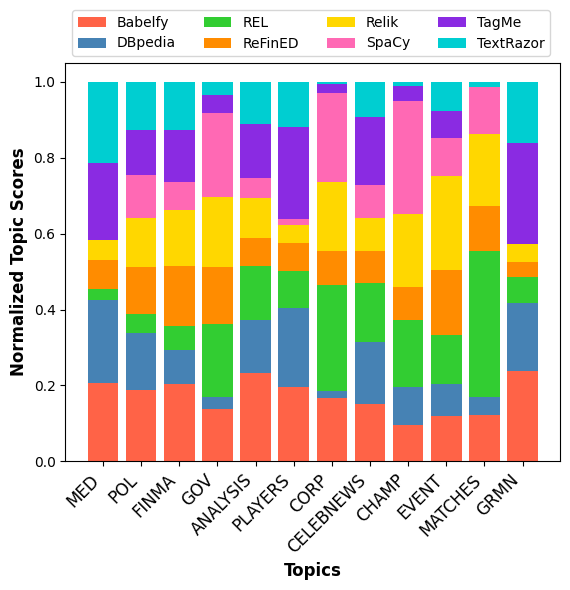

In [57]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model="mlp")
calculate_avgs(sys_doc_topics)
plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 

In [58]:
# print("----------------- evaluate: doc emb only ---------------------")

# docEmbOnly = evaluate(X_emb_only, y)


In [59]:
# import pickle
# with open("docEmbOnly.pickle", "wb") as docEmbOnlyFile:
#     pickle.dump(docEmbOnly, docEmbOnlyFile)
    

In [60]:
import pickle
with open("docEmbOnly.pickle", "rb") as docEmbOnlyFile:
    docEmbOnly= pickle.load(docEmbOnlyFile)

In [61]:
results_dict['docEmbOnly'] = docEmbOnly[0]

In [62]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = docEmbOnly

In [63]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.23505692599620492
recall@2 for    :dummy_mf is 0.4468690702087287
f1@2 for        :dummy_mf is 0.30806765118389573
precision@3 for :dummy_mf is 0.22438330170777546
recall@3 for    :dummy_mf is 0.6480075901328273
f1@3 for        :dummy_mf is 0.3333415879639182
precision@2 for :dummy_un is 0.2120493358633776
recall@2 for    :dummy_un is 0.4098671726755218
f1@2 for        :dummy_un is 0.27949752278559614
precision@3 for :dummy_un is 0.1571790006325104
recall@3 for    :dummy_un is 0.4478178368121442
f1@3 for        :dummy_un is 0.23268736528555667
precision@2 for :random_forest is 0.34772296015180265
recall@2 for    :random_forest is 0.6740986717267552
f1@2 for        :random_forest is 0.4587876753720628
precision@3 for :random_forest is 0.28889943074003754
recall@3 for    :random_forest is 0.8315939278937381
f1@3 for        :random_forest is 0.42882362581480604
precision@2 for :svm is 0.3678842504743833
recall@2 for    :svm is 0.7044592030360531
f1@2 for    

In [64]:
result

{'dummy_mf': {'accuracy': 0.2381404174573055,
  'f1_w': 0.0916065054126953,
  'recall_w': 0.2381404174573055,
  'precision_w': 0.05671085842673974,
  'f1_ma': 0.042741592166879526,
  'recall_ma': 0.1111111111111111,
  'precision_ma': 0.026460046384145054,
  'f1_mi': 0.2381404174573055,
  'recall_mi': 0.2381404174573055,
  'precision_mi': 0.2381404174573055,
  'best_params': {'dummy_mf': {},
   'dummy_un': {},
   'random_forest': {'max_depth': 10, 'n_estimators': 200},
   'svm': {'C': 1, 'kernel': 'rbf'},
   'knn': {'n_neighbors': 7, 'p': 1},
   'mlp': {'activation': 'tanh',
    'hidden_layer_sizes': (100,),
    'solver': 'sgd'}}},
 'dummy_un': {'accuracy': 0.11764705882352941,
  'f1_w': 0.13735433779965983,
  'recall_w': 0.11764705882352941,
  'precision_w': 0.18101755844412237,
  'f1_ma': 0.09615489451068379,
  'recall_ma': 0.09679097571721543,
  'precision_ma': 0.11415493504848137,
  'f1_mi': 0.11764705882352941,
  'recall_mi': 0.11764705882352941,
  'precision_mi': 0.117647058823529

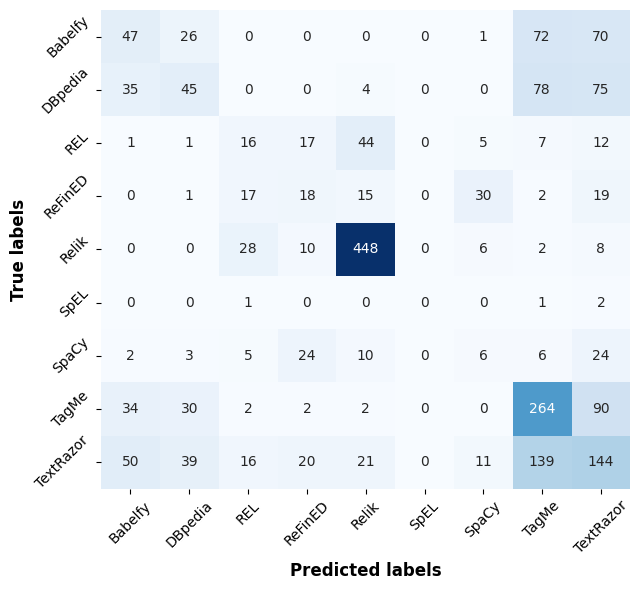

In [65]:
fig = plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)
fig.savefig("CM_mlp_PCA.pdf", format="pdf", bbox_inches="tight")

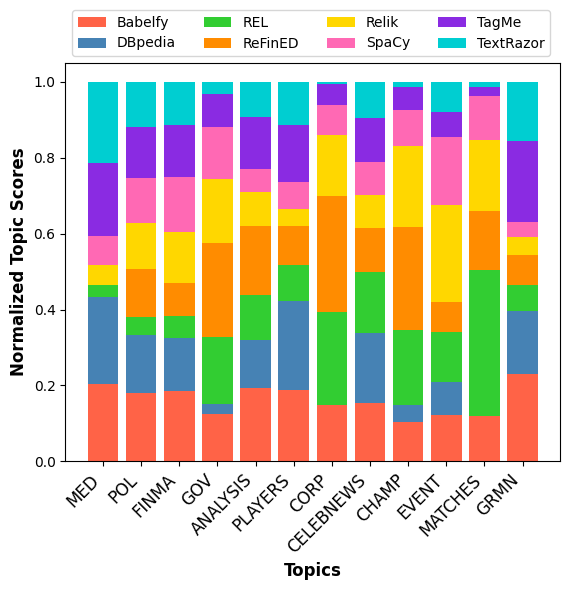

In [66]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model='mlp')
calculate_avgs(sys_doc_topics)
fig = plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 
fig.savefig("emb_only.pdf", format="pdf", bbox_inches="tight")

In [67]:
# print("----------------- evaluate: combined one one encoding (noisy) (PCA) ---------------------")
# oneHotPCA = evaluate(X_combined_one_hot_pca, y)

In [68]:
# import pickle
# with open("oneHotPCA.pickle", "wb") as oneHotPCAFile:
#     pickle.dump(oneHotPCA, oneHotPCAFile)

In [69]:
import pickle
with open("oneHotPCA.pickle", "rb") as oneHotPCAFile:
    oneHotPCA = pickle.load(oneHotPCAFile)

In [70]:
results_dict['oneHotPCA'] = oneHotPCA[0]

In [71]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = oneHotPCA

In [72]:
result

{'dummy_mf': {'accuracy': 0.2381404174573055,
  'f1_w': 0.0916065054126953,
  'recall_w': 0.2381404174573055,
  'precision_w': 0.05671085842673974,
  'f1_ma': 0.042741592166879526,
  'recall_ma': 0.1111111111111111,
  'precision_ma': 0.026460046384145054,
  'f1_mi': 0.2381404174573055,
  'recall_mi': 0.2381404174573055,
  'precision_mi': 0.2381404174573055,
  'best_params': {'dummy_mf': {},
   'dummy_un': {},
   'random_forest': {'max_depth': 10, 'n_estimators': 100},
   'svm': {'C': 0.1, 'kernel': 'linear'},
   'knn': {'n_neighbors': 7, 'p': 1},
   'mlp': {'activation': 'relu',
    'hidden_layer_sizes': (50,),
    'solver': 'sgd'}}},
 'dummy_un': {'accuracy': 0.10910815939278938,
  'f1_w': 0.12442966032626915,
  'recall_w': 0.10910815939278938,
  'precision_w': 0.16823087604546452,
  'f1_ma': 0.09444316370431785,
  'recall_ma': 0.10151123126334088,
  'precision_ma': 0.11098277713021887,
  'f1_mi': 0.10910815939278938,
  'recall_mi': 0.10910815939278938,
  'precision_mi': 0.10910815939

In [73]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.23268500948766604
recall@2 for    :dummy_mf is 0.4468690702087287
f1@2 for        :dummy_mf is 0.30602342609058486
precision@3 for :dummy_mf is 0.22280202403541635
recall@3 for    :dummy_mf is 0.6480075901328273
f1@3 for        :dummy_mf is 0.33159349718436193
precision@2 for :dummy_un is 0.21062618595825428
recall@2 for    :dummy_un is 0.4098671726755218
f1@2 for        :dummy_un is 0.2782584475044827
precision@3 for :dummy_un is 0.15591397849462305
recall@3 for    :dummy_un is 0.4478178368121442
f1@3 for        :dummy_un is 0.2312982645870995
precision@2 for :random_forest is 0.3444022770398482
recall@2 for    :random_forest is 0.6722011385199241
f1@2 for        :random_forest is 0.4554531279192393
precision@3 for :random_forest is 0.2803605313092966
recall@3 for    :random_forest is 0.8130929791271347
f1@3 for        :random_forest is 0.4169526686890542
precision@2 for :svm is 0.36480075901328274
recall@2 for    :svm is 0.7049335863377608
f1@2 for     

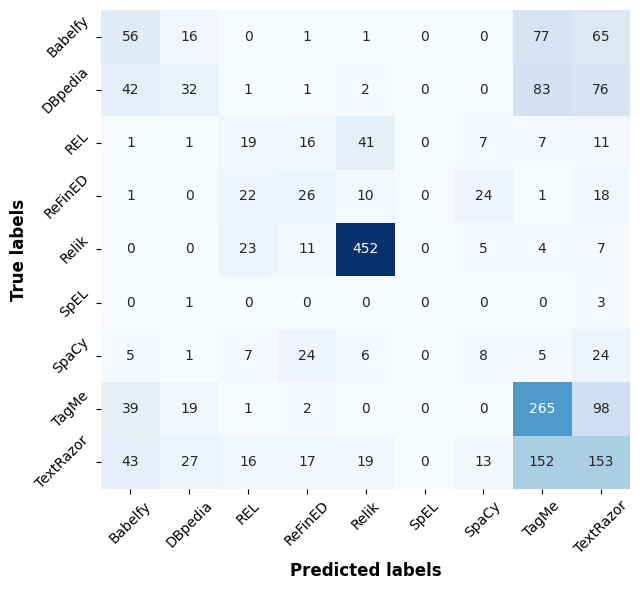

In [74]:
fig = plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)
fig.savefig("pca.pdf", format="pdf", bbox_inches="tight")

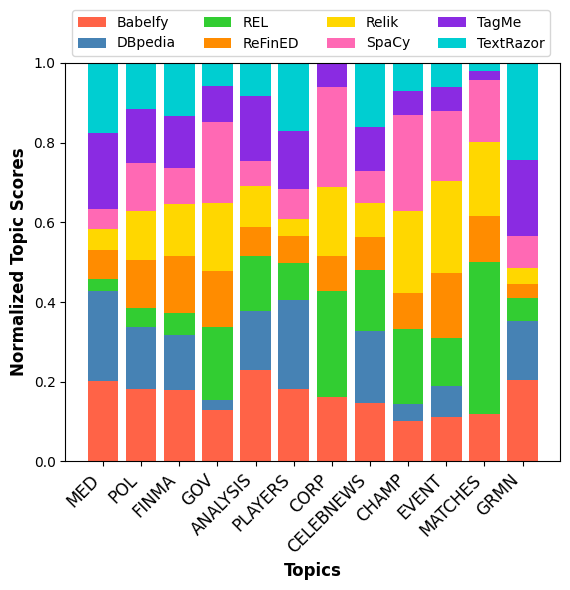

In [75]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model='mlp')
calculate_avgs(sys_doc_topics)
fig = plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 
fig.savefig("pca.pdf", format="pdf", bbox_inches="tight")

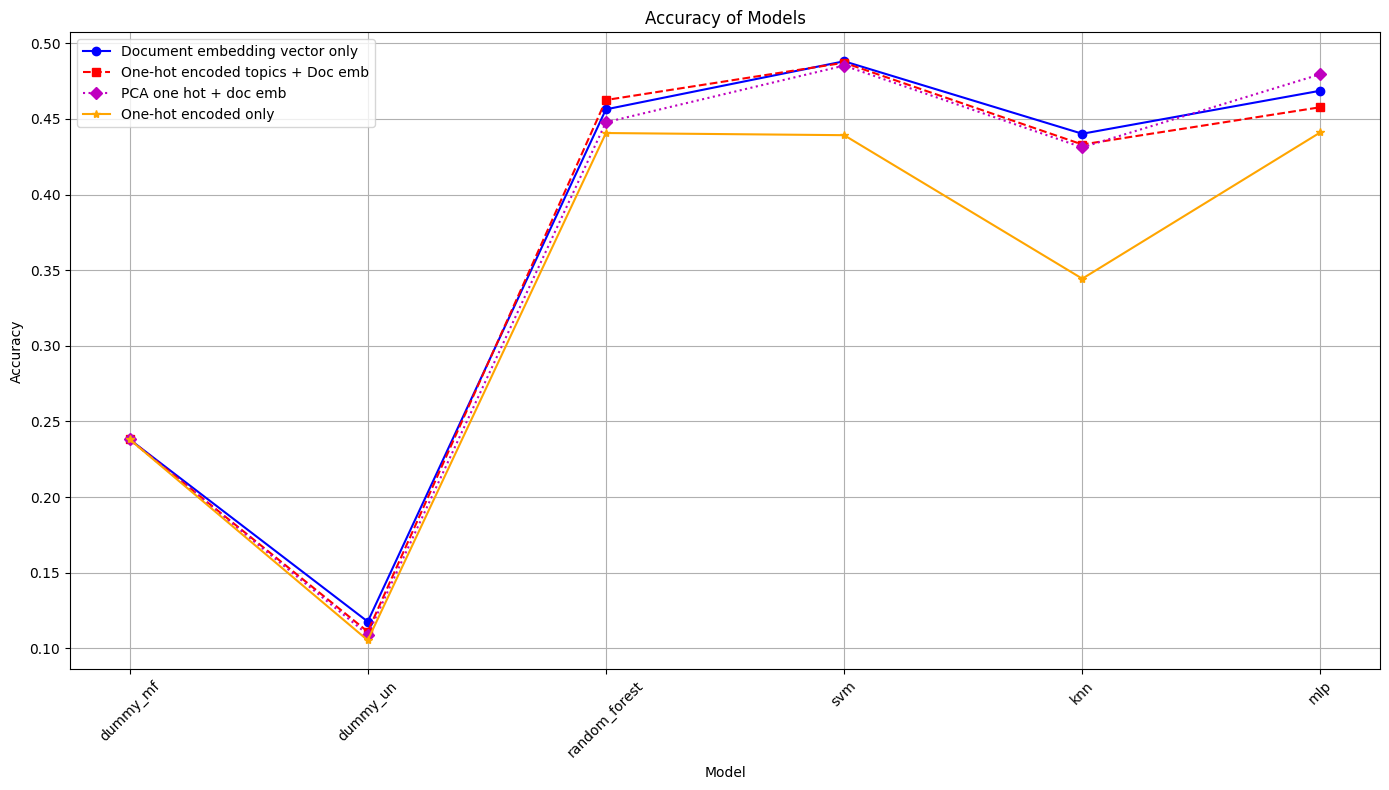

In [76]:

# Extracting model names
models = list(results_dict['docEmbOnly'].keys())

# Extracting accuracies for each method
accuracy_doc_emb = [results_dict['docEmbOnly'][model]['accuracy'] for model in models]
accuracy_one_hot = [results_dict['combOneHot'][model]['accuracy'] for model in models]
accuracy_pca_one_hot_doc_emb = [results_dict['oneHotPCA'][model]['accuracy'] for model in models]
accuracy_one_hot_only = [results_dict['oneHotOnly'][model]['accuracy'] for model in models]

# Plotting Accuracy
plt.figure(figsize=(14, 8))
plt.plot(models, accuracy_doc_emb, marker='o', color='b', linestyle='-', label='Document embedding vector only')
plt.plot(models, accuracy_one_hot, marker='s', color='r', linestyle='--', label='One-hot encoded topics + Doc emb')
plt.plot(models, accuracy_pca_one_hot_doc_emb, marker='D', color='m', linestyle=':', label='PCA one hot + doc emb')
plt.plot(models, accuracy_one_hot_only, marker='*', color='orange', linestyle='-', label='One-hot encoded only')
plt.xticks(rotation=45)
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [77]:
ds_doc = {}
for ds in raw_text_labels_files:
    ds_doc[ds['ds']] = []
    for key, value in ds['raw'].items():
        ds_doc[ds['ds']].append(value['doc'])


In [78]:
ds_doc['/local/users/unjde/analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl']

['Allen founded the EMP in Seattle, which featured exhibitions about Hendrix and Dylan, but also about various science fiction movies.',
 'Steve, Bill, Sergey, and Larry have drawn a great deal of admiration these days for their pioneering successes that changed the world we live in.',
 'Karl and Theo made their extreme fortunes selling low-price groceries.',
 'After the death of Steve, the former CEO of Apple, his commencement speech at Stanford was watched thousands of times.',
 'Angelina, her father Jon, and her partner Brad never played together in the same movie.',
 'The Enola Gay bombed Hiroshima at the end of Second World War.\ufeff',
 'Tiger was lost in the woods when he got divorced from Elin.',
 'Madonna played Eva and was seen with Carlos.',
 'Heidi and her husband Seal live in Vegas.',
 'Mars, Galaxy, and Bounty are all chocolate.',
 'David and Victoria added spice to their marriage.',
 "Eric preferred to play Blues instead of Rock, so he joined Mayall 's band.",
 'Desire c

In [79]:
def get_doc_id(text):
    for idx, doc in enumerate(doc_values):
        if doc == text:
            return idx
    return -1


In [80]:
get_doc_id(ds_doc['/local/users/unjde/analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl'][0])

0

In [81]:
get_doc_id("Allen founded the EMP in Seattle, which featured exhibitions about Hendrix and Dylan, but also about various science fiction movies.")

0

In [82]:
ds_doc_topics_gt = {}
not_treated = 0
for ds_name, list_docs in ds_doc.items():
    ds_doc_topics_gt[ds_name] = {}
    ds_doc_topics_gt[ds_name]['doc'] = []
    for doc in list_docs:
        if get_doc_id(doc) == -1:
            not_treated += 1
            continue
        document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[get_doc_id(doc)],reduced=True, num_topics=432897)
        ds_doc_topics_gt[ds_name]['doc'].append({
            'text': doc,
            'topics': document_topics,
            'scores': scores
        })


In [83]:
ds_doc_topics_gt['/local/users/unjde/analysis/data/datasets/medmention/corpus_pubtator.json']

{'doc': [{'text': 'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis. Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA samples for DCTN4 variants. A total of 121 adult CF patients from the Cochin Hospital CF centre have been includ

In [84]:
print(scores)

[[ 0.60292846  0.2849866   0.20383161  0.16735822  0.15422857  0.1527293
   0.15142067  0.13365705  0.12974688  0.04311533  0.00724573 -0.05532874]]


In [85]:
ds_doc_topics['/local/users/unjde/analysis/data/datasets/medmention/corpus_pubtator.json']['avgs']

[0.5906189819146093,
 0.2858663888222322,
 0.2446995285769829,
 0.2213980762250316,
 0.16531878719062865,
 0.15935626704807787,
 0.13552133847914438,
 0.13219418681428,
 0.11933309219858694,
 0.10507895082559779,
 0.04876616731587317,
 0.04209039963978816]

In [86]:

print(ds_doc_topics['/local/users/unjde/analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl']['topics'])
print(ds_doc_topics['/local/users/unjde/analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl']['avgs'])

[10, 6, 7, 4, 3, 1, 9, 5, 8, 11, 2, 0]
[0.30022332933213974, 0.18599152035183378, 0.16962716844346787, 0.14734381569756402, 0.14350630442301432, 0.09097301695081923, 0.08891892962985569, 0.0876818921830919, 0.07966808213127984, 0.05536058213975695, 0.04625920719570584, 0.009876296255323621]


In [87]:

print(ds_doc_topics['/local/users/unjde/analysis/data/datasets/medmention/corpus_pubtator.json']['topics'])
print(ds_doc_topics['/local/users/unjde/analysis/data/datasets/medmention/corpus_pubtator.json']['avgs'])

[0, 2, 1, 9, 4, 5, 11, 7, 8, 3, 10, 6]
[0.5906189819146093, 0.2858663888222322, 0.2446995285769829, 0.2213980762250316, 0.16531878719062865, 0.15935626704807787, 0.13552133847914438, 0.13219418681428, 0.11933309219858694, 0.10507895082559779, 0.04876616731587317, 0.04209039963978816]


In [88]:
topic_model.get_topics(num_topics=10)[0][7]

array(['lsu coach', 'coach', 'coach john', 'coach andy', 'les miles',
       'phil mickelson', 'steve stricker', 'oakland athletics',
       'lindsay davenport', 'inning tie', 'baltimore orioles', 'tnf il',
       'hernandez pitched', 'inzamam ul', 'ian healy', 'paul lawrie',
       'greenock morton', 'patrick rafter', 'nd', 'cyp cyp',
       'jason stoltenberg', 'boomer esiason', 'bobby valentine',
       'oakland baltimore', 'jeff wilson', 'fisher exact',
       'costas simitis', 'marcelo rios', 'spokesman dan',
       'cincinnati reds', 'justin marshall', 'waqar younis',
       'th halftime', 'last season', 'week ago', 'first baseman',
       'pete sampras', 'todd woodbridge', 'overs match', 'davis cup',
       'manager bobby', 'tnf', 'il tnf', 'michael chang', 'tony hayward',
       'lee westwood', 'andrew strauss', 'told reporters', 'police chief',
       'tim henman'], dtype='<U27')

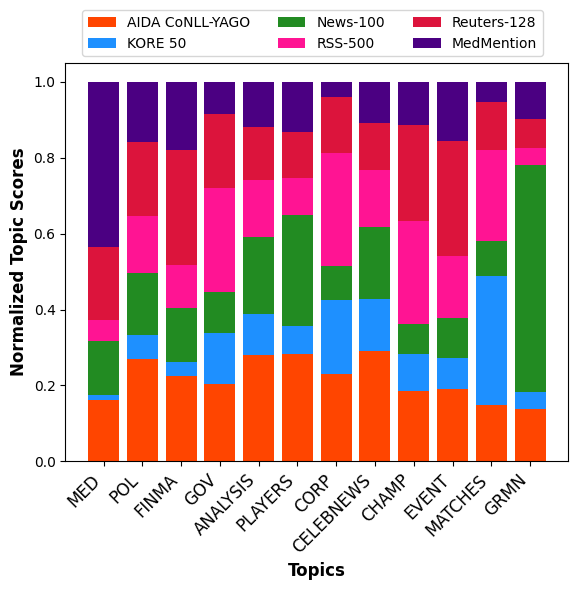

In [89]:
calculate_avgs(ds_doc_topics_gt)
fig = plot_topics_vs(ds_doc_topics_gt, y_offset=0.02, title='', ncols=3)
fig.savefig("topics_vs_datasets_ground_truth_all.pdf", format="pdf", bbox_inches="tight")

In [90]:
sys_doc_topics_gt = {}
not_treated = 0
for ds in raw_text_labels_files:
    ds = ds['raw']
    for key, doc_dict in ds.items():
        doc = doc_dict['doc']
        if get_doc_id(doc) == -1:
            not_treated += 1
            continue
        document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[get_doc_id(doc)],reduced=True, num_topics=432897)
        systems = [label['system'] for label in doc_dict['label']]
        for s in systems:
            if s not in sys_doc_topics_gt:
                sys_doc_topics_gt[s] = {}
                sys_doc_topics_gt[s]['doc'] = []
            sys_doc_topics_gt[s]['doc'].append({
                'text': doc,
                'topics': document_topics,
                'scores': scores
            })





In [91]:
sys_doc_topics_gt['Babelfy']

{'doc': [{'text': 'The Relationship Between Distance and Post-operative Visit Attendance Following Medical Male Circumcision in Nyanza Province, Kenya. To date, there is no research on voluntary medical male circumcision (VMMC) catchment areas or the relationship between distance to a VMMC facility and attendance at a post-operative follow-up visit. We analyzed data from a randomly selected subset of males self-seeking circumcision at one of 16 participating facilities in Nyanza Province, Kenya between 2008 and 2010. Among 1437 participants, 46.7 % attended follow-up. The median distance from residence to utilized facility was 2.98 km (IQR 1.31-5.38). Nearly all participants (98.8 %) lived within 5 km from a facility, however, 26.3 % visited a facility more than 5 km away. Stratified results demonstrated that among those utilizing fixed facilities, greater distance was associated with higher odds of follow-up non-attendance (OR 5.01-10km vs. 0-1km = 1.71, 95 % CI 1.08, 2.70, p = 0.02; 

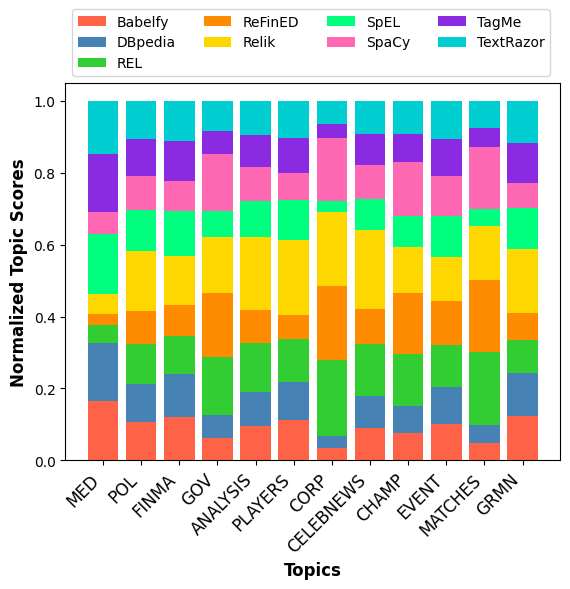

In [92]:
calculate_avgs(sys_doc_topics_gt)
fig = plot_topics_vs(sys_doc_topics_gt, title="", y_offset=-0.0, ncols=4)
fig.savefig("systems_vs_datasets_ground_truth_all.pdf", format="pdf", bbox_inches="tight")